In [83]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_csv('mymoviedb.csv', lineterminator = "\n")  # lineterminator = "\n" is used to show data live by line in a systematic manner
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


# Data Preprocessing

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [18]:
df.duplicated().sum()   # no duplicate movies found

0

In [19]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [21]:
df = df.drop(['Overview', 'Original_Language', 'Poster_Url'], axis = 1)

In [22]:
df

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022-03-01,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022-02-25,No Exit,2618.087,122,6.3,Thriller
3,2021-11-24,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021-12-22,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"
...,...,...,...,...,...,...
9822,1973-10-15,Badlands,13.357,896,7.6,"Drama, Crime"
9823,2020-10-01,Violent Delights,13.356,8,3.5,Horror
9824,2016-05-06,The Offering,13.355,94,5.0,"Mystery, Thriller, Horror"
9825,2021-03-31,The United States vs. Billie Holiday,13.354,152,6.7,"Music, Drama, History"


In [188]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'] ,errors='coerce')  # datatype of Released date is converted to datetime from object datatype 
print(df["Release_Date"].dtypes)
df["Release_Date"] = df["Release_Date"].astype("int64")

datetime64[ns]


In [187]:
df["Release_Date"] = df["Release_Date"].dt.year # year is extracted from datetime
df["Release_Date"].dtypes

dtype('int32')

In [177]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Release_Year
0,1970,Spider-Man: No Way Home,5083.954,8940,Hit,Action,1970
1,1970,Spider-Man: No Way Home,5083.954,8940,Hit,Adventure,1970
2,1970,Spider-Man: No Way Home,5083.954,8940,Hit,Science Fiction,1970
3,1970,The Batman,3827.658,1151,Hit,Crime,1970
4,1970,The Batman,3827.658,1151,Hit,Mystery,1970


In [61]:
def categorize_cols(df, col , labels):
    edges = [df[col].describe()['min'],
             df[col].describe()['25%'],
             df[col].describe()['50%'],
             df[col].describe()['75%'],
             df[col].describe()['max']]

    df[col] = pd.cut(df[col], edges , labels = labels , duplicates = 'drop')
    return df  

In [63]:
labels = ["Flop", "Below Average", "Average", "Hit"]
categorize_cols(df , "Vote_Average", labels)
df['Vote_Average'].unique()

['Hit', 'Below Average', 'Average', 'Flop', NaN]
Categories (4, object): ['Flop' < 'Below Average' < 'Average' < 'Hit']

In [64]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,1970,Spider-Man: No Way Home,5083.954,8940,Hit,"Action, Adventure, Science Fiction"
1,1970,The Batman,3827.658,1151,Hit,"Crime, Mystery, Thriller"
2,1970,No Exit,2618.087,122,Below Average,Thriller
3,1970,Encanto,2402.201,5076,Hit,"Animation, Comedy, Family, Fantasy"
4,1970,The King's Man,1895.511,1793,Average,"Action, Adventure, Thriller, War"


In [65]:
df["Vote_Average"].value_counts()

Vote_Average
Flop             2467
Hit              2450
Average          2412
Below Average    2398
Name: count, dtype: int64

In [66]:
df.isna().sum()

Release_Date      0
Title             0
Popularity        0
Vote_Count        0
Vote_Average    100
Genre             0
dtype: int64

In [67]:
df.dropna(inplace = True)

In [69]:
df.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

In [72]:
df['Genre'] = df['Genre'].str.split(', ')
df = df.explode('Genre').reset_index(drop = True)
df.head()


,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,1970,Spider-Man: No Way Home,5083.954,8940,Hit,Action
1,1970,Spider-Man: No Way Home,5083.954,8940,Hit,Adventure
2,1970,Spider-Man: No Way Home,5083.954,8940,Hit,Science Fiction
3,1970,The Batman,3827.658,1151,Hit,Crime
4,1970,The Batman,3827.658,1151,Hit,Mystery


In [74]:
df['Genre'] = df['Genre'].astype('category')
df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [75]:
df.nunique()

Release_Date       1
Title           9415
Popularity      8088
Vote_Count      3265
Vote_Average       4
Genre             19
dtype: int64

# Data Visualization

### Q1. most Frequent genre of the movies released on netflix?

In [92]:
sns.set_style('whitegrid')

C:\Users\HARSH  GUPTA\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\HARSH  GUPTA\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


Text(0.5, 1.0, 'Most Frequent Genre of the Movies Released')

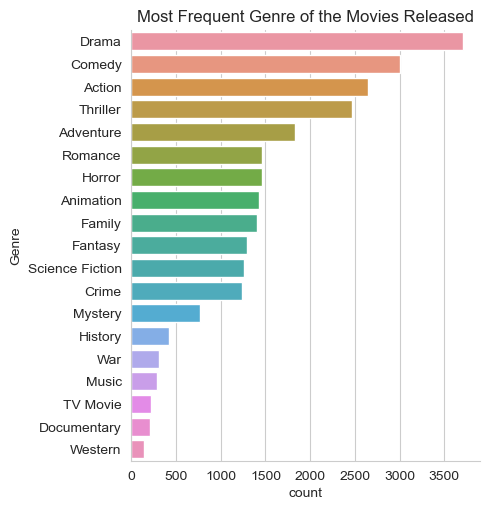

In [103]:
sns.catplot(y = 'Genre', data = df , kind = 'count' , order = df['Genre'].value_counts().index)
plt.title("Most Frequent Genre of the Movies Released")


### Q2. which movies has highest no. of votes in vote avg column?

In [102]:
df['Vote_Average'].describe()

count       25552
unique          4
top       Average
freq         6613
Name: Vote_Average, dtype: object

C:\Users\HARSH  GUPTA\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\HARSH  GUPTA\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


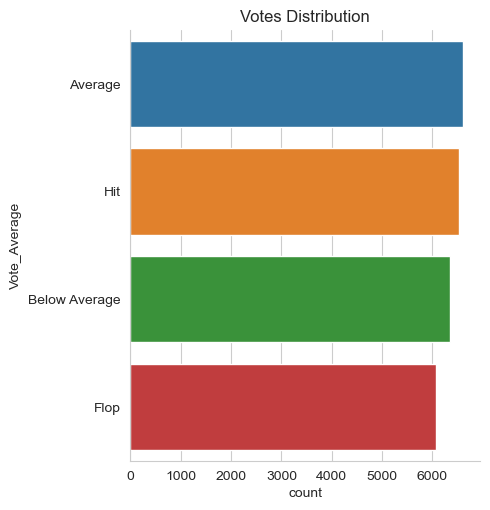

In [108]:
sns.catplot(y = 'Vote_Average' , data = df , kind = 'count', order = df['Vote_Average'].value_counts().index)
plt.title('Votes Distribution')
plt.show()

### Q3. Which movie has highest value of popularity and what is its Genre ?

In [121]:
df[df['Popularity'] == df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,1970,Spider-Man: No Way Home,5083.954,8940,Hit,Action
1,1970,Spider-Man: No Way Home,5083.954,8940,Hit,Adventure
2,1970,Spider-Man: No Way Home,5083.954,8940,Hit,Science Fiction


### Q4. Which movie has Lowest value of popularity and what is its Genre ?

In [123]:
df[df['Popularity'] == df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25546,1970,The United States vs. Billie Holiday,13.354,152,Average,Music
25547,1970,The United States vs. Billie Holiday,13.354,152,Average,Drama
25548,1970,The United States vs. Billie Holiday,13.354,152,Average,History
25549,1970,Threads,13.354,186,Hit,War
25550,1970,Threads,13.354,186,Hit,Drama
25551,1970,Threads,13.354,186,Hit,Science Fiction
